In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
data = pd.read_csv(r"""C:\Users\guntu\Desktop\data science\linear regression\test.csv""")
print(data)

      x          y
0    77  79.775152
1    21  23.177279
2    22  25.609262
3    20  17.857388
4    36  41.849864
..   ..        ...
295  71  68.545888
296  46  47.334876
297  55  54.090637
298  62  63.297171
299  47  52.459467

[300 rows x 2 columns]


In [3]:
data.isnull().sum() #There are no null value in the training dataset

x    0
y    0
dtype: int64

In [4]:
data.shape #There are 300 rows and 2 columsn in the dataset

(300, 2)

In [5]:
data_1 = pd.read_csv(r"""C:\Users\guntu\Desktop\data science\linear regression\train.csv""")
print(data_1)

        x          y
0    24.0  21.549452
1    50.0  47.464463
2    15.0  17.218656
3    38.0  36.586398
4    87.0  87.288984
..    ...        ...
695  58.0  58.595006
696  93.0  94.625094
697  82.0  88.603770
698  66.0  63.648685
699  97.0  94.975266

[700 rows x 2 columns]


In [6]:
data_1.isnull().sum() #There is one missing values in our training dataset

x    0
y    1
dtype: int64

In [7]:
data_1.shape

(700, 2)

### Dropping the missing value as the missing value count is less

In [8]:
data_2 = data_1.dropna()

In [9]:
data_2.shape # As we dropped the one missing value the shape of the data is 699 rows and two columns

(699, 2)

#### As the testing data has no decimals like we have in training set we should reshape the data same as test data before training 

# Reshape to fit

In [10]:
x_train = np.array(data_2.iloc[:,0].values)
x_train = x_train.reshape(-1,1)
x_train[:20]

array([[24.],
       [50.],
       [15.],
       [38.],
       [87.],
       [36.],
       [12.],
       [81.],
       [25.],
       [ 5.],
       [16.],
       [16.],
       [24.],
       [39.],
       [54.],
       [60.],
       [26.],
       [73.],
       [29.],
       [31.]])

In [11]:
y_train = np.array(data_2.iloc[:,1].values)
y_train[:20]

array([21.54945196, 47.46446305, 17.21865634, 36.58639803, 87.28898389,
       32.46387493, 10.78089683, 80.7633986 , 24.61215147,  6.96331907,
       11.23757338, 13.53290206, 24.60323899, 39.40049976, 48.43753838,
       61.69900319, 26.92832418, 70.4052055 , 29.34092408, 25.30895192])

In [12]:
x_test = np.array(data.iloc[:,0].values)
y_test = np.array(data.iloc[:,1].values)
x_test = x_test.reshape(-1,1)
print(x_test[:20])
print(y_test[:20])

[[77]
 [21]
 [22]
 [20]
 [36]
 [15]
 [62]
 [95]
 [20]
 [ 5]
 [ 4]
 [19]
 [96]
 [62]
 [36]
 [15]
 [65]
 [14]
 [87]
 [69]]
[79.77515201 23.17727887 25.60926156 17.85738813 41.84986439  9.80523488
 58.87465933 97.61793701 18.39512747  8.74674765  2.81141583 17.09537241
 95.14907176 61.38800663 40.24701716 14.82248589 66.95806869 16.63507984
 90.65513736 77.22982636]


In [13]:
reg = LinearRegression()
reg.fit(x_train,y_train)

y_predict = reg.predict(x_test)
y_predict[:20]

array([76.94327594, 20.90651855, 21.90717494, 19.90586217, 35.91636428,
       14.90258026, 61.93343021, 94.95509081, 19.90586217,  4.89601644,
        3.89536006, 18.90520579, 95.95574719, 61.93343021, 35.91636428,
       14.90258026, 64.93539936, 13.90192388, 86.94983976, 68.93802488])

# Scatterplot for prediction

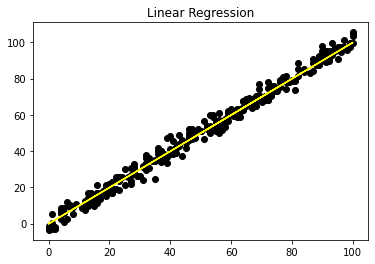

Model Accuracy : 98.88014444327563


In [14]:
plt.scatter(x_test,y_test,color="black")
plt.plot(x_test,y_predict,color="yellow")
plt.title("Linear Regression")
plt.show()

print("Model Accuracy : {accuracy}".format(accuracy = reg.score(x_test,y_test)*100))